# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [3]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../../data/'

In [4]:
#f_app_train = os.path.join(dir_data, 'application_train.csv')
#app_train = pd.read_csv(f_app_train)
#f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(dir_data +'application_train.csv')
app_train.shape

(307511, 122)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [58]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_train.columns

In [ ]:
app_train.dtypes

In [ ]:
dtype_df = app_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

In [50]:
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

In [ ]:
app_train[int_features].mean()

In [ ]:
app_train[int_features].std()

In [67]:
app_train[float_features].mean()

AMT_INCOME_TOTAL                168797.919297
AMT_CREDIT                      599025.999706
AMT_ANNUITY                      27108.573909
AMT_GOODS_PRICE                 538396.207429
REGION_POPULATION_RELATIVE           0.020868
DAYS_REGISTRATION                -4986.120328
OWN_CAR_AGE                         12.061091
CNT_FAM_MEMBERS                      2.152665
EXT_SOURCE_1                         0.502130
EXT_SOURCE_2                         0.514393
EXT_SOURCE_3                         0.510853
APARTMENTS_AVG                       0.117440
BASEMENTAREA_AVG                     0.088442
YEARS_BEGINEXPLUATATION_AVG          0.977735
YEARS_BUILD_AVG                      0.752471
COMMONAREA_AVG                       0.044621
ELEVATORS_AVG                        0.078942
ENTRANCES_AVG                        0.149725
FLOORSMAX_AVG                        0.226282
FLOORSMIN_AVG                        0.231894
LANDAREA_AVG                         0.066333
LIVINGAPARTMENTS_AVG              

In [68]:
app_train[float_features].max()

AMT_INCOME_TOTAL                1.170000e+08
AMT_CREDIT                      4.050000e+06
AMT_ANNUITY                     2.580255e+05
AMT_GOODS_PRICE                 4.050000e+06
REGION_POPULATION_RELATIVE      7.250800e-02
DAYS_REGISTRATION               0.000000e+00
OWN_CAR_AGE                     9.100000e+01
CNT_FAM_MEMBERS                 2.000000e+01
EXT_SOURCE_1                    9.626928e-01
EXT_SOURCE_2                    8.549997e-01
EXT_SOURCE_3                    8.960095e-01
APARTMENTS_AVG                  1.000000e+00
BASEMENTAREA_AVG                1.000000e+00
YEARS_BEGINEXPLUATATION_AVG     1.000000e+00
YEARS_BUILD_AVG                 1.000000e+00
COMMONAREA_AVG                  1.000000e+00
ELEVATORS_AVG                   1.000000e+00
ENTRANCES_AVG                   1.000000e+00
FLOORSMAX_AVG                   1.000000e+00
FLOORSMIN_AVG                   1.000000e+00
LANDAREA_AVG                    1.000000e+00
LIVINGAPARTMENTS_AVG            1.000000e+00
LIVINGAREA

In [52]:
app_train[float_features].std()

AMT_INCOME_TOTAL                237123.146279
AMT_CREDIT                      402490.776996
AMT_ANNUITY                      14493.737315
AMT_GOODS_PRICE                 369446.460540
REGION_POPULATION_RELATIVE           0.013831
DAYS_REGISTRATION                 3522.886321
OWN_CAR_AGE                         11.944812
CNT_FAM_MEMBERS                      0.910682
EXT_SOURCE_1                         0.211062
EXT_SOURCE_2                         0.191060
EXT_SOURCE_3                         0.194844
APARTMENTS_AVG                       0.108240
BASEMENTAREA_AVG                     0.082438
YEARS_BEGINEXPLUATATION_AVG          0.059223
YEARS_BUILD_AVG                      0.113280
COMMONAREA_AVG                       0.076036
ELEVATORS_AVG                        0.134576
ENTRANCES_AVG                        0.100049
FLOORSMAX_AVG                        0.144641
FLOORSMIN_AVG                        0.161380
LANDAREA_AVG                         0.081184
LIVINGAPARTMENTS_AVG              

In [7]:
app_train['AMT_INCOME_TOTAL'].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
225000.0    20698
202500.0    16341
67500.0     11147
270000.0    10827
81000.0      6001
315000.0     5862
247500.0     5344
126000.0     4668
360000.0     4115
121500.0     3848
99000.0      3633
292500.0     3418
103500.0     3330
76500.0      3146
144000.0     3123
171000.0     2647
450000.0     2435
117000.0     2390
54000.0      2319
72000.0      2187
166500.0     2053
45000.0      2043
108000.0     1946
337500.0     1790
94500.0      1747
            ...  
100300.5        1
200794.5        1
100476.0        1
200961.0        1
200997.0        1
100507.5        1
100516.5        1
50274.0         1
201127.5        1
100566.0        1
402376.5        1
100629.0        1
201267.0        1
50323.5         1
201361.5        1
100786.5        1
201658.5        1
100854.0        1
245046.6        1
201811.5        1
403650.0        1
100944.0        1
58950.0         1
101083.5        1
404406.0  

In [8]:
app_train['AMT_INCOME_TOTAL'].nunique()

2548

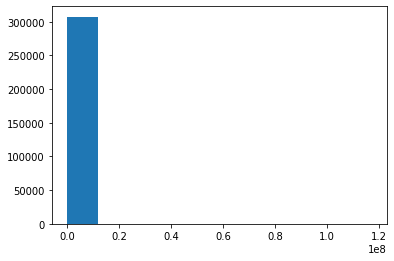

In [9]:
plt.hist(app_train['AMT_INCOME_TOTAL'])
plt.show()